In [1]:
import pandas as pd
df = pd.read_csv('make_gold_features_example.csv')

In [11]:
df

,deviation_normal,ride_date,car_id,value,diff_value
0,0,01-01,G115,-1.5,0.0
1,-5,01-02,G115,-6.0,0.0
2,-6,01-03,G115,-6.0,0.0
3,-4,01-04,G115,-4.5,0.0
4,-5,01-05,G115,-3.5,0.0
...,...,...,...,...,...
455,-11,03-28,d-21,-11.0,0.0
456,-11,03-29,d-21,-11.5,0.0
457,-12,03-30,d-21,-12.0,0.0
458,-12,03-31,d-21,-12.0,0.0


In [12]:
df["value"] = df.groupby(["car_id", "ride_date"], as_index=False)["deviation_normal"].transform("mean")
df = df.drop_duplicates(subset=["car_id", "ride_date"]).copy()

df["diff_value"] = df.groupby("car_id", as_index=False)["value"].transform(pd.Series.diff)
df["diff_value"] = df["diff_value"].apply(lambda x: x if x >= 5 else 0)

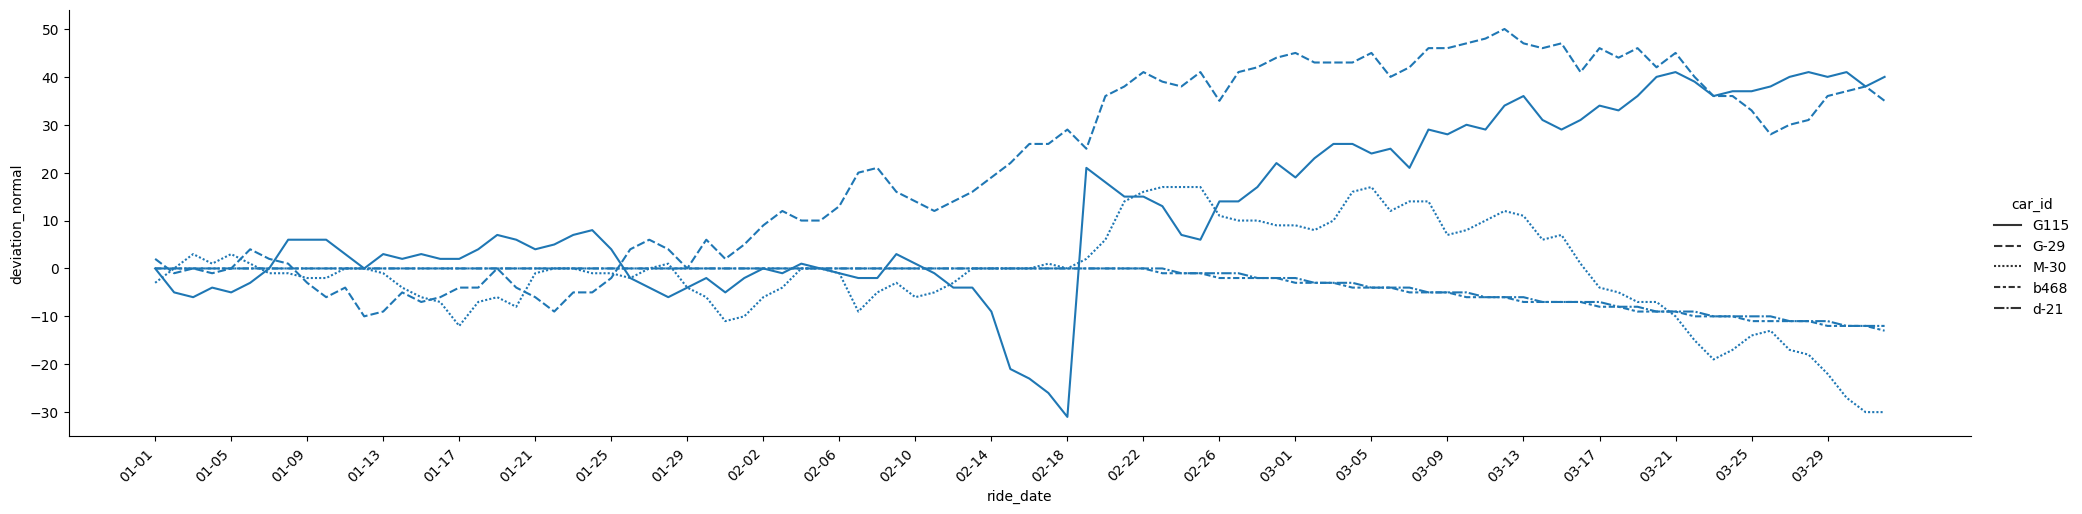

In [4]:
import seaborn as sns

g = sns.relplot(
    data=df,
    kind="line",
    x="ride_date",
    y="deviation_normal",  # user_ride_quality
    aspect=4,
    style="car_id",
    legend=True,
)
g.set_xticklabels(rotation=45, horizontalalignment="right", step=4);

In [5]:
df["diff_value"] = df.groupby(["car_id"], as_index=False)["deviation_normal"].transform(pd.Series.diff)
df["diff_value"] = df["diff_value"].apply(lambda x: x if x >= 5 else 0)

In [13]:
df["value"] = df.groupby(["car_id", "ride_date"], as_index=False)["deviation_normal"].transform("mean")
df = df.drop_duplicates(subset=["car_id", "ride_date"]).copy()

df["diff_value"] = df.groupby("car_id", as_index=False)["value"].transform(pd.Series.diff)
df["diff_value"] = df["diff_value"].apply(lambda x: x if x >= 5 else 0)

In [14]:
df

,deviation_normal,ride_date,car_id,value,diff_value
0,0,01-01,G115,0.0,0.0
1,-5,01-02,G115,-5.0,0.0
2,-6,01-03,G115,-6.0,0.0
3,-4,01-04,G115,-4.0,0.0
4,-5,01-05,G115,-5.0,0.0
...,...,...,...,...,...
455,-11,03-28,d-21,-11.0,0.0
456,-11,03-29,d-21,-11.0,0.0
457,-12,03-30,d-21,-12.0,0.0
458,-12,03-31,d-21,-12.0,0.0


In [7]:
df

,deviation_normal,ride_date,car_id,value,diff_value
0,0,01-01,G115,-1.5,0.0
1,-5,01-02,G115,-6.0,0.0
2,-6,01-03,G115,-6.0,0.0
3,-4,01-04,G115,-4.5,0.0
4,-5,01-05,G115,-3.5,0.0
...,...,...,...,...,...
455,-11,03-28,d-21,-11.0,0.0
456,-11,03-29,d-21,-11.5,0.0
457,-12,03-30,d-21,-12.0,0.0
458,-12,03-31,d-21,-12.0,0.0


In [8]:
grouped_df = df.groupby('car_id')['deviation_normal'].agg([('gold_feature_1', 'max'), ('gold_feature_2', 'idxmin')]).reset_index()

In [9]:
import numpy as np 
grouped_df['gold_feature_2'] = np.where(grouped_df['gold_feature_1'] == 0, 0, grouped_df['gold_feature_2'])

In [10]:
grouped_df

,car_id,gold_feature_1,gold_feature_2
0,G-29,50,103
1,G115,41,48
2,M-30,17,274
3,b468,0,0
4,d-21,0,0
